In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import nibabel as nib 
import glob

df=pd.read_table('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted.csv', header=0, delimiter=',')
sub_left=df['LESIONED_HEMISPHERE']

# load SMATT
smatt_dir= '/Users/emilyolafson/GIT/ENIGMA/data/lesion_load/smatt_all_motor_rois/smatt-template/'
smatt_files = glob.glob(smatt_dir + '*.nii')

smatts = [smatt.replace(smatt_dir, '').replace('-S-MATT.nii', '') for smatt in smatt_files]
smatts.remove('S-MATT.nii')
smatts.sort()


LM1_CST = nib.load(smatt_dir + 'Left-M1-S-MATT.nii').get_fdata()
LPMd_CST = nib.load(smatt_dir + 'Left-PMd-S-MATT.nii').get_fdata()
LPMv_CST = nib.load(smatt_dir + 'Left-PMv-S-MATT.nii').get_fdata()
LS1_CST = nib.load(smatt_dir + 'Left-S1-S-MATT.nii').get_fdata()
LSMA_CST = nib.load(smatt_dir + 'Left-SMA-S-MATT.nii').get_fdata()
LpreSMA_CST = nib.load(smatt_dir + 'Left-preSMA-S-MATT.nii').get_fdata()

RM1_CST = nib.load(smatt_dir + 'Right-M1-S-MATT.nii').get_fdata()
RPMd_CST = nib.load(smatt_dir + 'Right-PMd-S-MATT.nii').get_fdata()
RPMv_CST = nib.load(smatt_dir + 'Right-PMv-S-MATT.nii').get_fdata()
RS1_CST = nib.load(smatt_dir + 'Right-S1-S-MATT.nii').get_fdata()
RSMA_CST = nib.load(smatt_dir + 'Right-SMA-S-MATT.nii').get_fdata()
RpreSMA_CST = nib.load(smatt_dir + 'Right-preSMA-S-MATT.nii').get_fdata()

lesion_folder = '/Users/emilyolafson/GIT/ENIGMA/data/lesionmasks/all_lesionmasks_2009tov6_usingSym_rename/'

In [2]:
# ipsilesional CST
colnames = ['M1','PMd','PMv','S1','SMA','preSMA']

# calculate lesion load for each subject and append to growing table
sub_vecs=np.empty(shape=(0, 6))
                  
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata()
    if sub_left[sub]==1: #left
        M1_CST_sub=np.sum(lesion*LM1_CST)/np.sum(LM1_CST)
        PMd_CST_sub=np.sum(lesion*LPMd_CST)/np.sum(LPMd_CST)
        PMv_CST_sub=np.sum(lesion*LPMv_CST)/np.sum(LPMv_CST)
        S1_CST_sub=np.sum(lesion*LS1_CST)/np.sum(LS1_CST)
        SMA_CST_sub=np.sum(lesion*LSMA_CST)/np.sum(LSMA_CST)
        preSMA_CST_sub=np.sum(lesion*LpreSMA_CST)/np.sum(LpreSMA_CST)

    if sub_left[sub]==2: #right
        M1_CST_sub=np.sum(lesion*RM1_CST)/np.sum(RM1_CST)
        PMd_CST_sub=np.sum(lesion*RPMd_CST)/np.sum(RPMd_CST)
        PMv_CST_sub=np.sum(lesion*RPMv_CST)/np.sum(RPMv_CST)
        S1_CST_sub=np.sum(lesion*RS1_CST)/np.sum(RS1_CST)
        SMA_CST_sub=np.sum(lesion*RSMA_CST)/np.sum(RSMA_CST)
        preSMA_CST_sub=np.sum(lesion*RpreSMA_CST)/np.sum(RpreSMA_CST)
        
    if sub_left[sub]==3 or sub_left[sub]==4 or  sub_left[sub]==5 or  sub_left[sub]==6:
        # 3 = bilateral
        # 4 = brainstem
        # 5 = cerebellum
        # 6 = combination of cerebral hemisphere + brainstem/cerebellum
        M1_CST_sub=np.mean((np.sum(lesion*RM1_CST)/np.sum(RM1_CST),np.sum(lesion*LM1_CST)))/np.sum(LM1_CST)
        PMd_CST_sub=np.mean((np.sum(lesion*RPMd_CST)/np.sum(RPMd_CST),np.sum(lesion*LPMd_CST)))/np.sum(LPMd_CST)
        PMv_CST_sub=np.mean((np.sum(lesion*RPMv_CST)/np.sum(RPMv_CST),np.sum(lesion*LPMv_CST)))/np.sum(LPMv_CST)
        S1_CST_sub=np.mean((np.sum(lesion*RS1_CST)/np.sum(RS1_CST),np.sum(lesion*LS1_CST)))/np.sum(LS1_CST)
        SMA_CST_sub=np.mean((np.sum(lesion*RSMA_CST)/np.sum(RSMA_CST),np.sum(lesion*LSMA_CST)))/np.sum(LSMA_CST)
        preSMA_CST_sub=np.mean((np.sum(lesion*RpreSMA_CST)/np.sum(RpreSMA_CST),np.sum(lesion*LpreSMA_CST)))/np.sum(LpreSMA_CST)

    subvec=[M1_CST_sub, PMd_CST_sub, PMv_CST_sub, S1_CST_sub, SMA_CST_sub, preSMA_CST_sub]
    sub_vecs=np.append(sub_vecs, np.reshape(subvec, [1, 6]), axis=0)

smatt_ll_ipsilesional = pd.DataFrame(columns=colnames, data = sub_vecs)
smatt_ll_ipsilesional['Motor score']=np.transpose(df['NORMED_MOTOR'].values)

In [3]:
# bihemispheric CST
colnames = ['L_M1','L_PMd','L_PMv','L_S1','L_SMA','L_preSMA','R_M1','R_PMd','R_PMv','R_S1','R_SMA','R_preSMA']

# calculate lesion load for each subject and append to growing table
sub_vecs=np.empty(shape=(0, 12))
                  
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata()
    L_M1_CST_sub=np.sum(lesion*LM1_CST)/np.sum(LM1_CST)
    L_PMd_CST_sub=np.sum(lesion*LPMd_CST)/np.sum(LPMd_CST)
    L_PMv_CST_sub=np.sum(lesion*LPMv_CST)/np.sum(LPMv_CST)
    L_S1_CST_sub=np.sum(lesion*LS1_CST)/np.sum(LS1_CST)
    L_SMA_CST_sub=np.sum(lesion*LSMA_CST)/np.sum(LSMA_CST)
    L_preSMA_CST_sub=np.sum(lesion*LpreSMA_CST)/np.sum(LpreSMA_CST)

    R_M1_CST_sub=np.sum(lesion*RM1_CST)/np.sum(RM1_CST)
    R_PMd_CST_sub=np.sum(lesion*RPMd_CST)/np.sum(RPMd_CST)
    R_PMv_CST_sub=np.sum(lesion*RPMv_CST)/np.sum(RPMv_CST)
    R_S1_CST_sub=np.sum(lesion*RS1_CST)/np.sum(RS1_CST)
    R_SMA_CST_sub=np.sum(lesion*RSMA_CST)/np.sum(RSMA_CST)
    R_preSMA_CST_sub=np.sum(lesion*RpreSMA_CST)/np.sum(RpreSMA_CST)
    
   
    subvec=[L_M1_CST_sub, L_PMd_CST_sub, L_PMv_CST_sub, L_S1_CST_sub, L_SMA_CST_sub, L_preSMA_CST_sub,R_M1_CST_sub, R_PMd_CST_sub, R_PMv_CST_sub, R_S1_CST_sub, R_SMA_CST_sub, R_preSMA_CST_sub]
    sub_vecs=np.append(sub_vecs, np.reshape(subvec, [1, 12]), axis=0)

smatt_ll_bihemispheric = pd.DataFrame(columns=colnames, data = sub_vecs)
smatt_ll_bihemispheric['Motor score']=np.transpose(df['NORMED_MOTOR'].values)

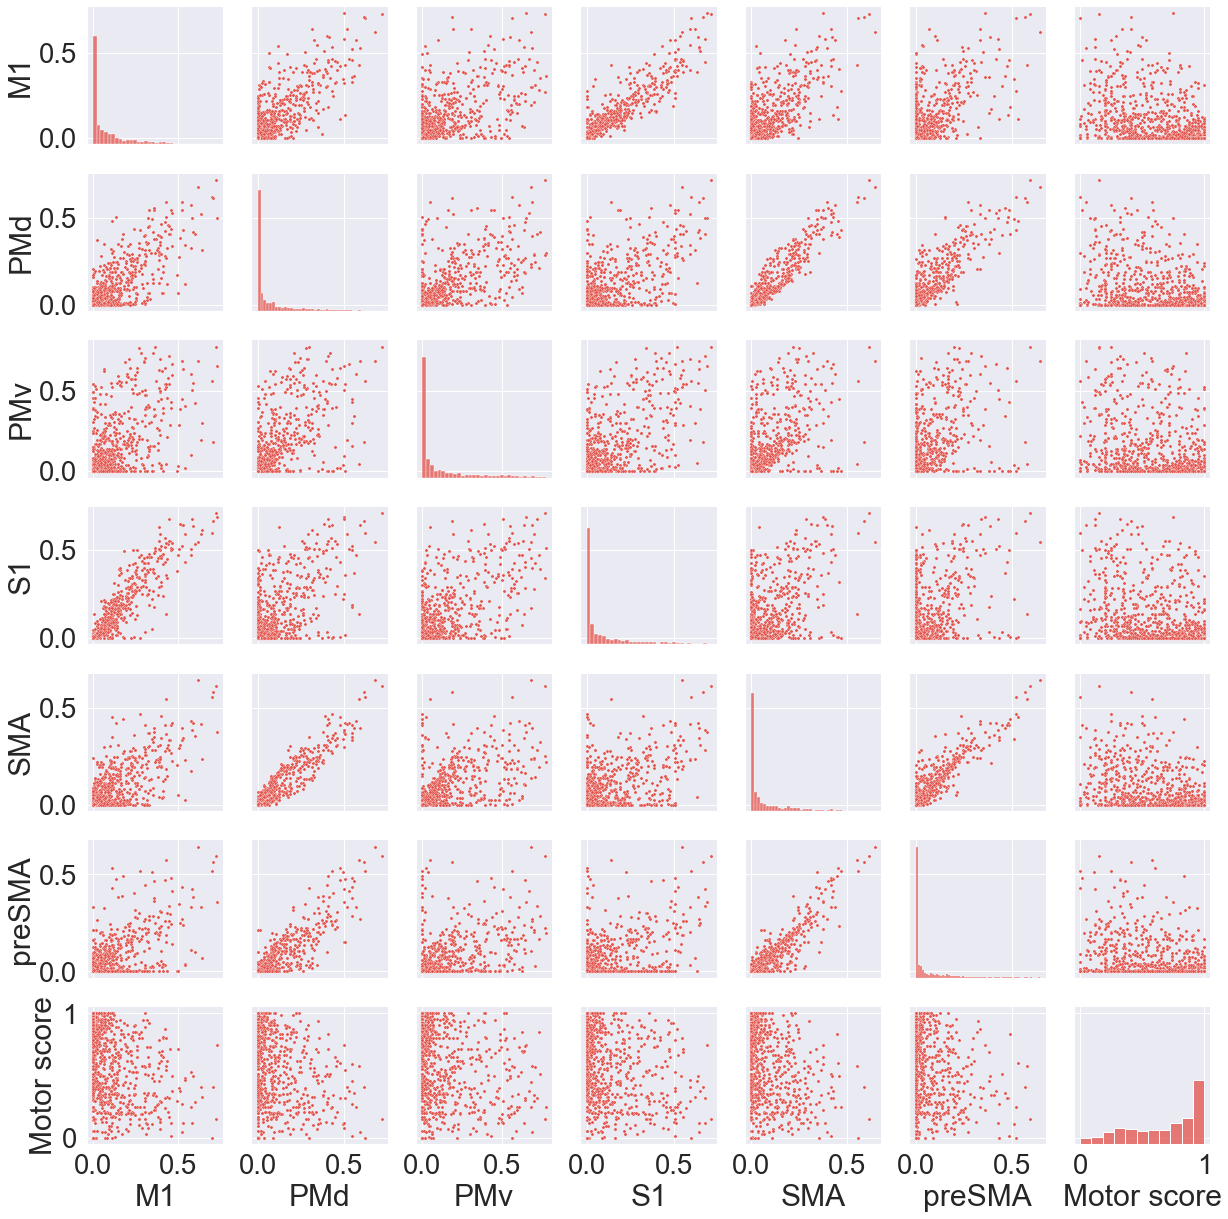

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(font_scale=2.5)
sns.set_palette('Spectral')
sns.pairplot(smatt_ll_ipsilesional,plot_kws={"s": 10})
plt.savefig('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/SMATT_ipsi_scatterplts.png')

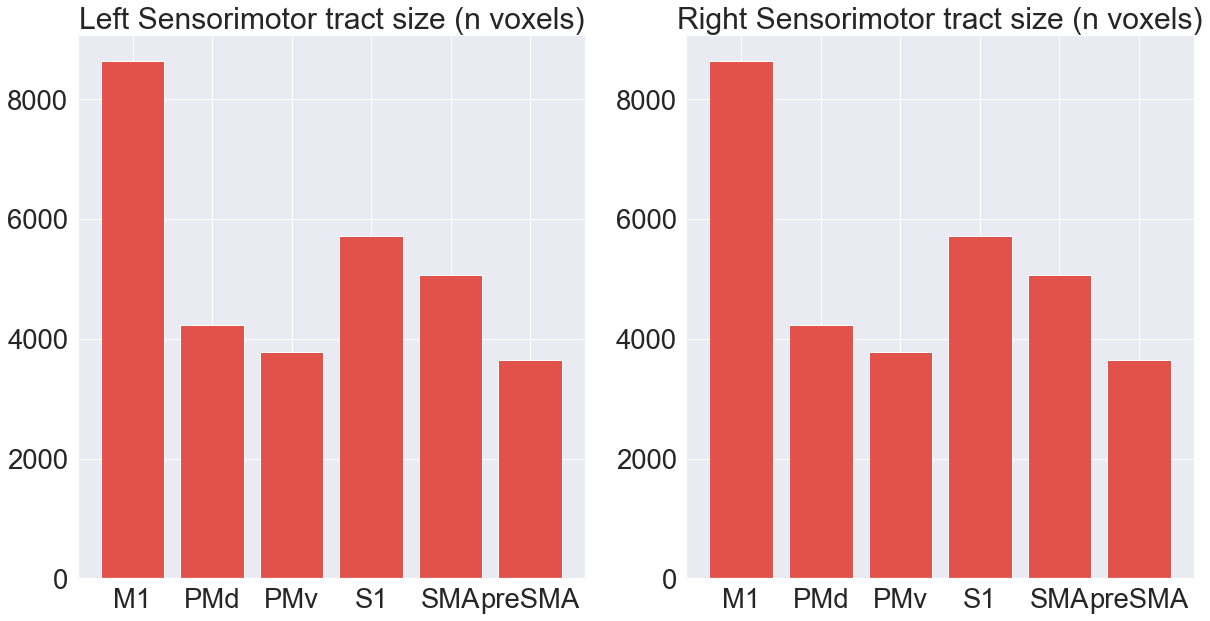

In [5]:
volTractsL = [np.sum(LM1_CST), np.sum(LPMd_CST), np.sum(LPMv_CST), np.sum(LS1_CST),np.sum(LSMA_CST),np.sum(LpreSMA_CST)]
volTractsR = [np.sum(RM1_CST), np.sum(RPMd_CST), np.sum(RPMv_CST), np.sum(RS1_CST),np.sum(RSMA_CST),np.sum(RpreSMA_CST)]

fig, ax = plt.subplots(1,2,figsize = (20, 10))
ax[0].bar(['M1', 'PMd', 'PMv', 'S1', 'SMA', 'preSMA'], volTractsL)
ax[0].set_title('Left Sensorimotor tract size (n voxels)')
ax[1].bar(['M1', 'PMd', 'PMv', 'S1', 'SMA', 'preSMA'], volTractsR)
ax[1].set_title('Right Sensorimotor tract size (n voxels)')

plt.savefig('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/SMATT_tractvol.png')

Text(0.5, 1.0, 'Left Sensorimotor tract size (n voxels)')

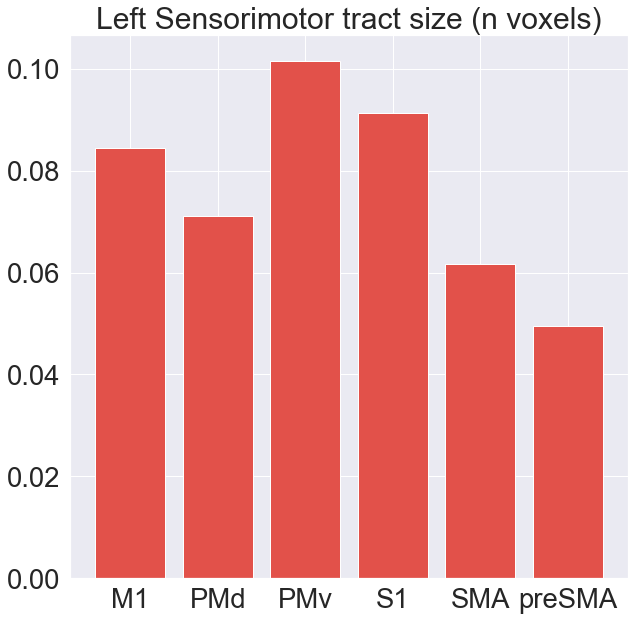

In [7]:
mean_LL = np.mean(smatt_ll_ipsilesional.iloc[:,0:6],axis=0)

fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(['M1', 'PMd', 'PMv', 'S1', 'SMA', 'preSMA'], mean_LL)
ax.set_title('Mean lesion load for ipsilesional CSTs (n voxels)')

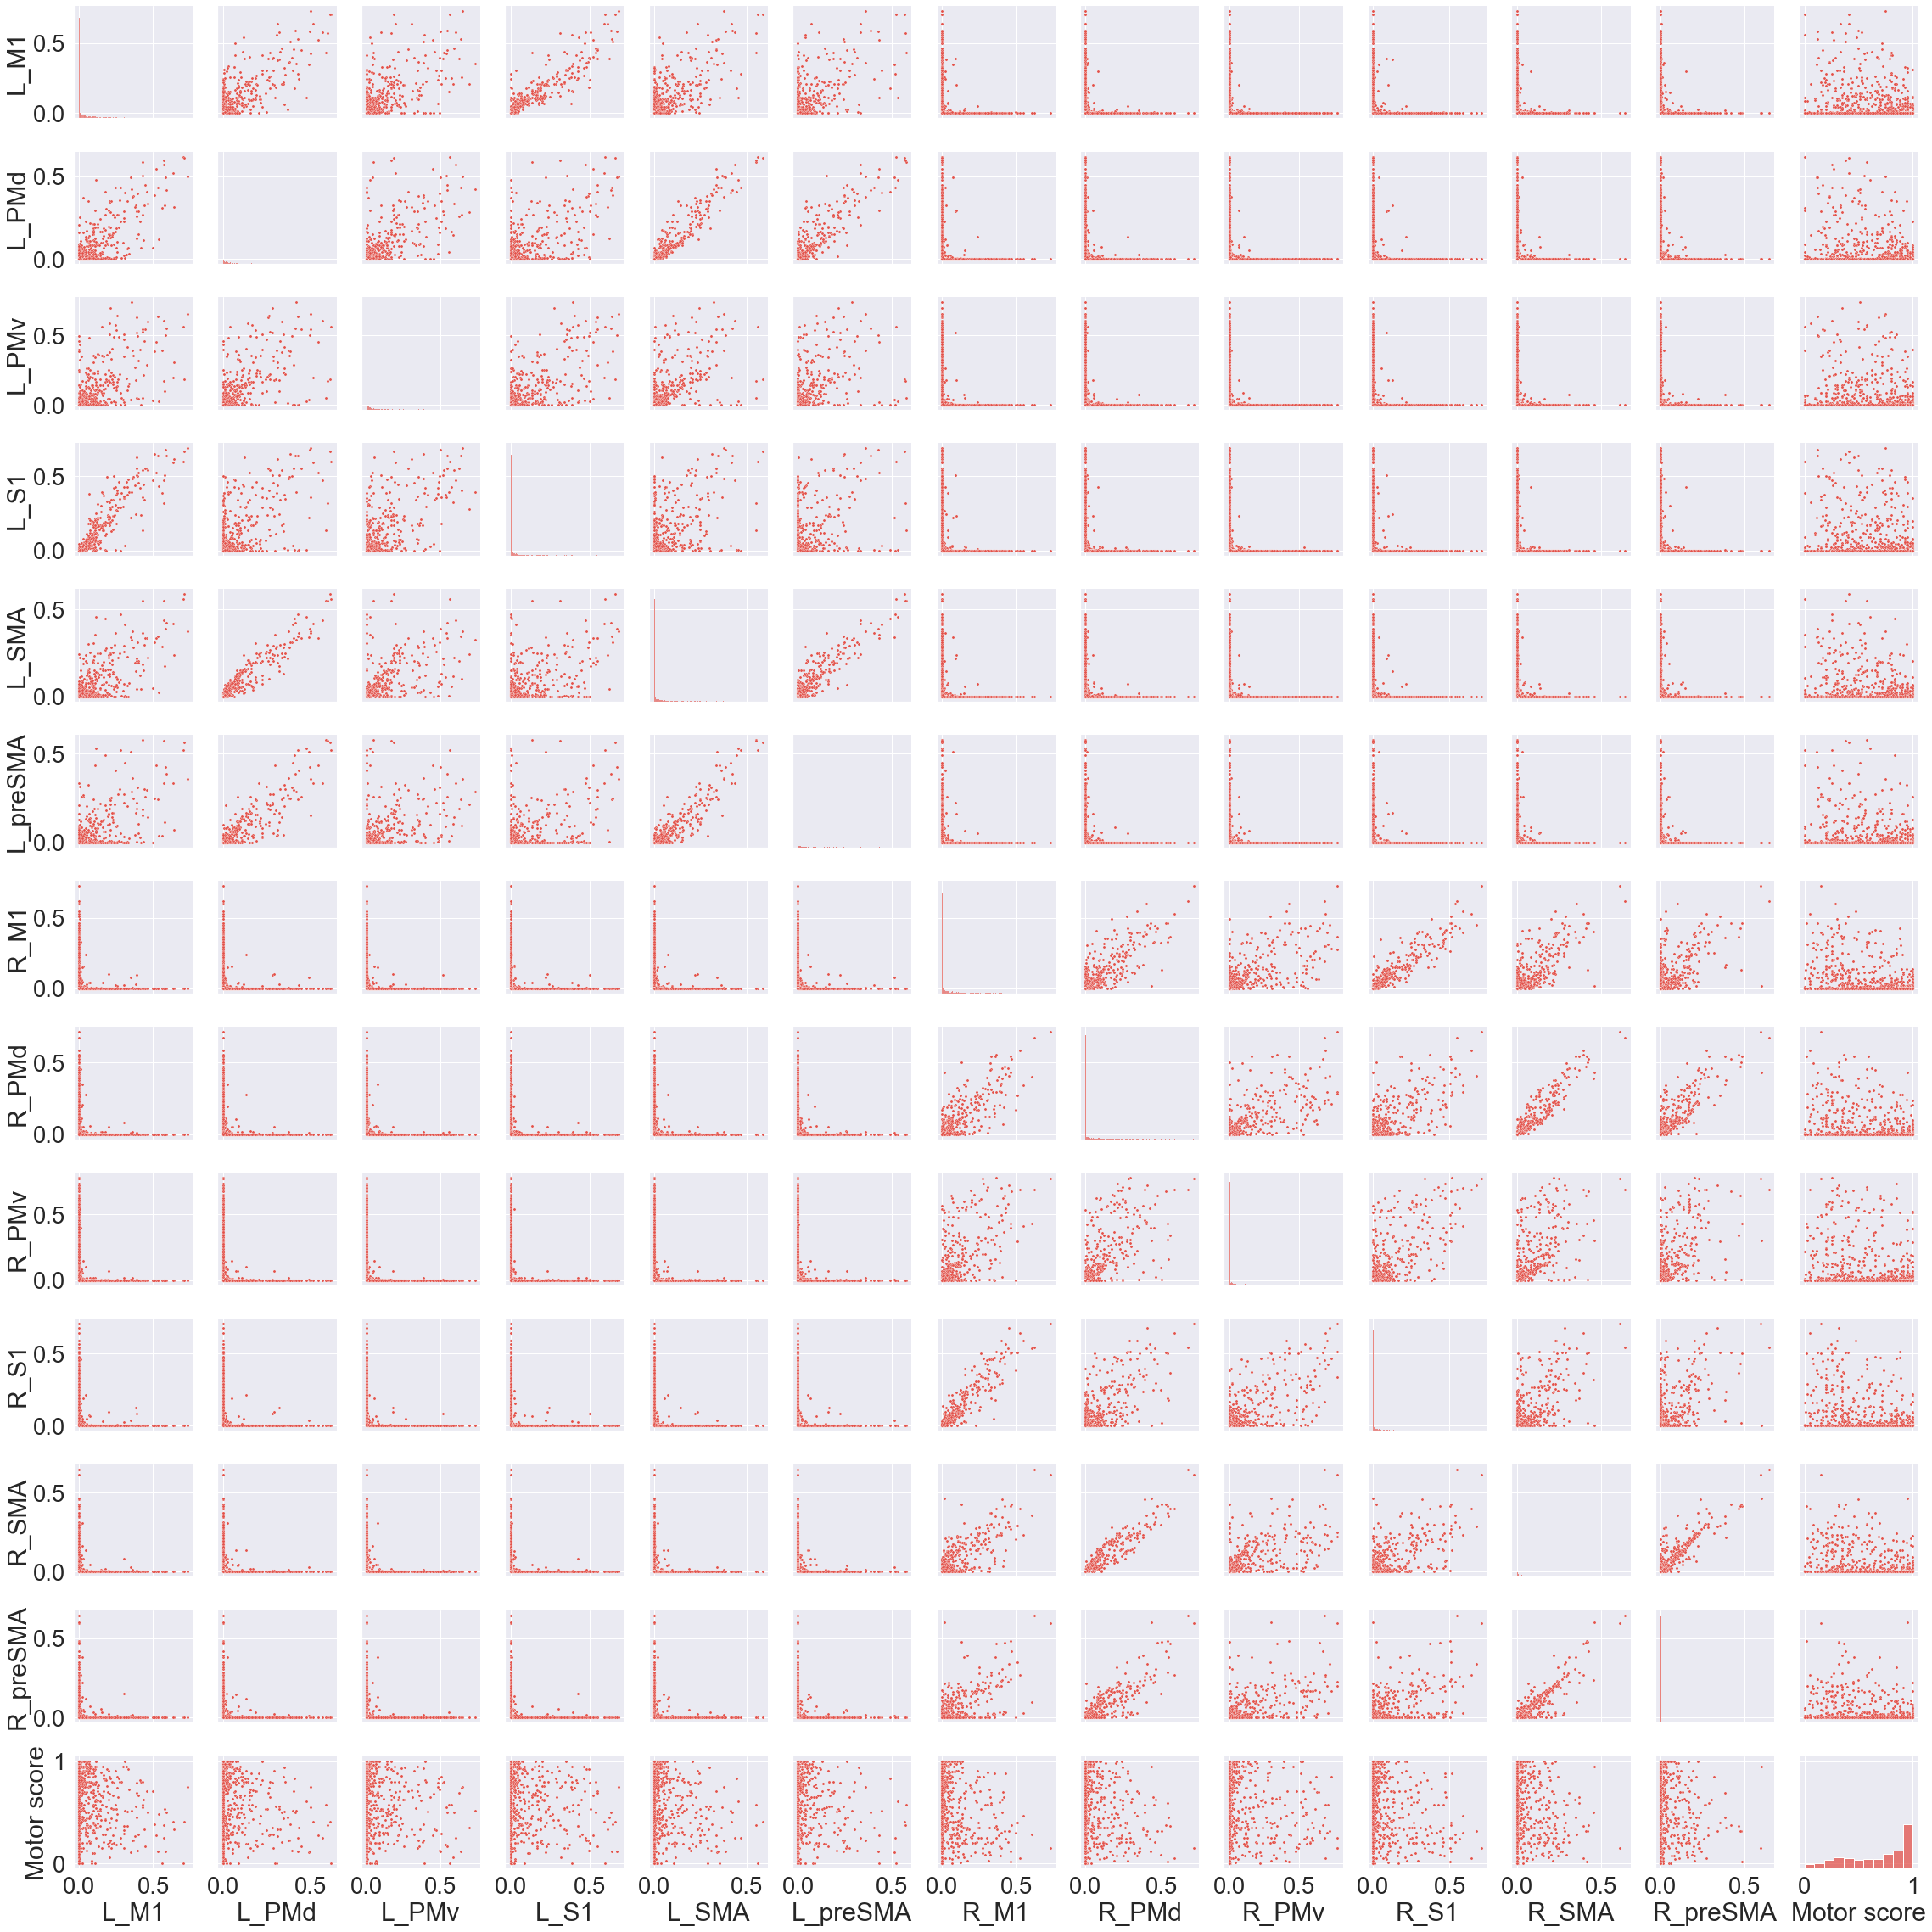

In [8]:
sns.set(font_scale=2.5)
sns.set_palette('Spectral')
sns.pairplot(smatt_ll_bihemispheric,plot_kws={"s": 10})
plt.savefig('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/SMATT_bi_scatterplts.png')